In [2]:
import kaggle

!kaggle datasets download -d atharvaarya25/financials

Dataset URL: https://www.kaggle.com/datasets/atharvaarya25/financials
License(s): DbCL-1.0


In [3]:
!unzip financials.zip

Archive:  financials.zip
  inflating: Financials.csv          


In [4]:
import pandas as pd
df = pd.read_csv('Financials.csv')
print("Financials.csv:")
print(df.head())

Financials.csv:
      Segment  Country     Product   Discount Band   Units Sold   \
0  Government   Canada   Carretera            None    $1,618.50    
1  Government  Germany   Carretera            None    $1,321.00    
2   Midmarket   France   Carretera            None    $2,178.00    
3   Midmarket  Germany   Carretera            None      $888.00    
4   Midmarket   Mexico   Carretera            None    $2,470.00    

   Manufacturing Price   Sale Price   Gross Sales   Discounts         Sales   \
0                $3.00       $20.00    $32,370.00        $-      $32,370.00    
1                $3.00       $20.00    $26,420.00        $-      $26,420.00    
2                $3.00       $15.00    $32,670.00        $-      $32,670.00    
3                $3.00       $15.00    $13,320.00        $-      $13,320.00    
4                $3.00       $15.00    $37,050.00        $-      $37,050.00    

          COGS        Profit         Date  Month Number  Month Name   Year  
0   $16,185.00   

In [5]:
# Update DataFrame to remove both "$" and "-" characters from string columns
df = df.apply(lambda x: x.str.replace('[-\$]', '', regex=True) if x.dtype == "object" else x)

# Display the cleaned DataFrame or continue with additional data processing
print(df.head())

      Segment  Country     Product   Discount Band   Units Sold   \
0  Government   Canada   Carretera            None     1,618.50    
1  Government  Germany   Carretera            None     1,321.00    
2   Midmarket   France   Carretera            None     2,178.00    
3   Midmarket  Germany   Carretera            None       888.00    
4   Midmarket   Mexico   Carretera            None     2,470.00    

   Manufacturing Price   Sale Price   Gross Sales   Discounts        Sales   \
0                 3.00        20.00     32,370.00                32,370.00    
1                 3.00        20.00     26,420.00                26,420.00    
2                 3.00        15.00     32,670.00                32,670.00    
3                 3.00        15.00     13,320.00                13,320.00    
4                 3.00        15.00     37,050.00                37,050.00    

         COGS       Profit         Date  Month Number  Month Name   Year  
0   16,185.00    16,185.00   01/01/2014  

In [6]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"1,618.50",3.00,20.00,"32,370.00",,"32,370.00","16,185.00","16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"1,321.00",3.00,20.00,"26,420.00",,"26,420.00","13,210.00","13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"2,178.00",3.00,15.00,"32,670.00",,"32,670.00","21,780.00","10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,"13,320.00",,"13,320.00","8,880.00","4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"2,470.00",3.00,15.00,"37,050.00",,"37,050.00","24,700.00","12,350.00",01/06/2014,6,June,2014


In [7]:
print(df.columns)

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')


In [8]:
# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Display the cleaned column names to confirm the changes
print(df.columns)

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')


In [9]:
# Grouping by country and summing Sales and Profit
summary = df.groupby('Country')[['Sales', 'Profit']].sum().reset_index()

# Sorting by Profit in descending order
summary = summary.sort_values(by='Profit', ascending=False)

# Displaying the summary table
print(summary)

                    Country  \
4  United States of America   
0                    Canada   
2                   Germany   
3                    Mexico   
1                    France   

                                               Sales  \
4   9,225.00  8,001.00  10,944.00  3,52,625.00  2...   
0   32,370.00  30,216.00  3,33,187.50  43,125.00 ...   
2   26,420.00  13,320.00  5,29,550.00  13,815.00 ...   
3   37,050.00  37,050.00  2,87,400.00  14,610.00 ...   
1   32,670.00  37,980.00  8,235.00  2,25,500.00  ...   

                                              Profit  
4   3,075.00  2,286.00  8,208.00  14,105.00  17,5...  
0   16,185.00  22,662.00  13,327.50  1,725.00  2,...  
2   13,210.00  4,440.00  1,36,170.00  4,605.00  1...  
3   12,350.00  12,350.00  47,900.00  4,870.00  1,...  
1   10,890.00  18,990.00  2,745.00  9,020.00  10,...  


In [10]:
# Grouping by country and summing Sales and Profit
summary = df.groupby('Country')[['Sales', 'Profit']].sum().reset_index()

# Sorting by Profit in descending order
summary = summary.sort_values(by='Profit', ascending=False)

# Displaying the summary table
print(summary)


                    Country  \
4  United States of America   
0                    Canada   
2                   Germany   
3                    Mexico   
1                    France   

                                               Sales  \
4   9,225.00  8,001.00  10,944.00  3,52,625.00  2...   
0   32,370.00  30,216.00  3,33,187.50  43,125.00 ...   
2   26,420.00  13,320.00  5,29,550.00  13,815.00 ...   
3   37,050.00  37,050.00  2,87,400.00  14,610.00 ...   
1   32,670.00  37,980.00  8,235.00  2,25,500.00  ...   

                                              Profit  
4   3,075.00  2,286.00  8,208.00  14,105.00  17,5...  
0   16,185.00  22,662.00  13,327.50  1,725.00  2,...  
2   13,210.00  4,440.00  1,36,170.00  4,605.00  1...  
3   12,350.00  12,350.00  47,900.00  4,870.00  1,...  
1   10,890.00  18,990.00  2,745.00  9,020.00  10,...  


In [11]:
import numpy as np

# Convert to string and clean commas, spaces, and parentheses
df['Sales'] = df['Sales'].astype(str).str.replace(',', '').str.strip()
df['Profit'] = df['Profit'].astype(str).str.replace(',', '').str.strip()

# Convert negative values in parentheses to negative numbers
df['Profit'] = df['Profit'].str.replace(r'^\((.*)\)$', r'-\1', regex=True)

# Replace empty values with NaN
df['Sales'] = df['Sales'].replace(r'^\s*$', np.nan, regex=True)
df['Profit'] = df['Profit'].replace(r'^\s*$', np.nan, regex=True)

# Drop rows with missing values
df.dropna(subset=['Sales', 'Profit'], inplace=True)

# Final conversion to float
df['Sales'] = df['Sales'].astype(float)
df['Profit'] = df['Profit'].astype(float)


In [12]:
summary = df.groupby('Country')[['Sales', 'Profit']].sum().reset_index()

import plotly.express as px

fig = px.bar(
    summary,
    x='Country',
    y=['Sales', 'Profit'],
    title='Sales and Profit by Country',
    labels={'value': 'Amount (USD)', 'variable': 'Metric'},
    barmode='group'
)
fig.show()


In [13]:
# Filtering data only for France
france_df = df[df['Country'] == 'France'].copy()


In [14]:
# Columns that might contain dirty data
columns_to_check = ['Sales', 'Units Sold', 'COGS', 'Sale Price', 'Discounts',
                    'Gross Sales', 'Manufacturing Price', 'Profit']

for col in columns_to_check:
    france_df[col] = france_df[col].astype(str) \
        .str.replace(',', '') \
        .str.replace(r'\((.*)\)', r'-\1', regex=True) \
        .str.strip()
    france_df[col] = pd.to_numeric(france_df[col], errors='coerce')

# Drop rows with NaN values
france_df.dropna(subset=columns_to_check, inplace=True)


In [15]:
# Correlation analysis
france_corr = france_df[columns_to_check].corr()['Profit'].sort_values(ascending=False)
print(france_corr)


Profit                 1.000000
Sales                  0.830846
Gross Sales            0.814906
COGS                   0.755517
Sale Price             0.664219
Discounts              0.475044
Units Sold             0.163067
Manufacturing Price    0.032967
Name: Profit, dtype: float64


In [18]:
# Encode the 'Segment' column into numeric values
segment_mapping = {'Government': 0, 'Midmarket': 1, 'Enterprise': 2, 'Channel Partners': 3}
france_df['Segment_Code'] = france_df['Segment'].map(segment_mapping)




In [19]:
corr_matrix = france_df[columns_to_check].corr()


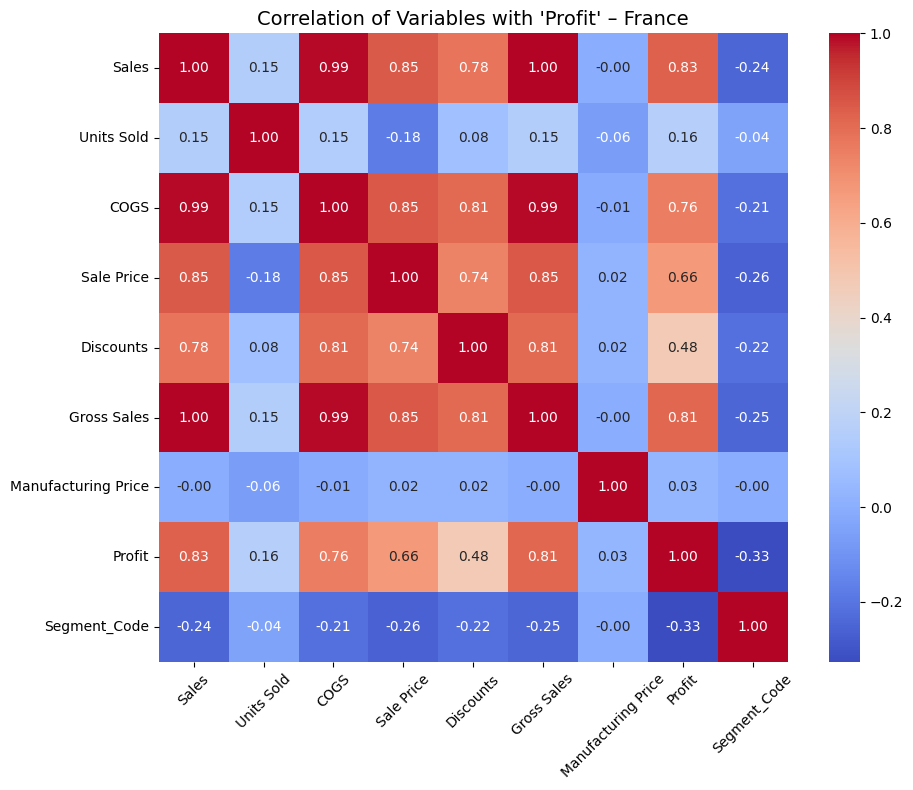

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to include in correlation analysis
columns_to_check = ['Sales', 'Units Sold', 'COGS', 'Sale Price', 'Discounts',
                    'Gross Sales', 'Manufacturing Price', 'Profit', 'Segment_Code']

# Calculate the correlation matrix
corr_matrix = france_df[columns_to_check].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title("Correlation of Variables with 'Profit' – France", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [21]:
european_countries = ['France', 'Germany', 'United Kingdom', 'Spain', 'Italy']


In [22]:
# Creating a DataFrame for European countries
europe_df = df[df['Country'].isin(european_countries)].copy()

# Encoding the 'Segment' column (if not already done)
europe_df['Segment_Code'] = europe_df['Segment'].map(segment_mapping)

# Cleaning numeric values
for col in columns_to_check:
    europe_df[col] = europe_df[col].astype(str) \
        .str.replace(',', '') \
        .str.replace(r'\((.*)\)', r'-\1', regex=True) \
        .str.strip()
    europe_df[col] = pd.to_numeric(europe_df[col], errors='coerce')

# Removing rows with missing values
europe_df.dropna(subset=columns_to_check, inplace=True)



In [23]:
europe_corr = europe_df[columns_to_check].corr()['Profit'].sort_values(ascending=False)

print("Korelacja z Profit – Europa:")
print(europe_corr)


Korelacja z Profit – Europa:
Profit                 1.000000
Sales                  0.885372
Gross Sales            0.873781
COGS                   0.819628
Sale Price             0.732441
Discounts              0.486294
Units Sold             0.255493
Manufacturing Price    0.113308
Segment_Code          -0.311309
Name: Profit, dtype: float64


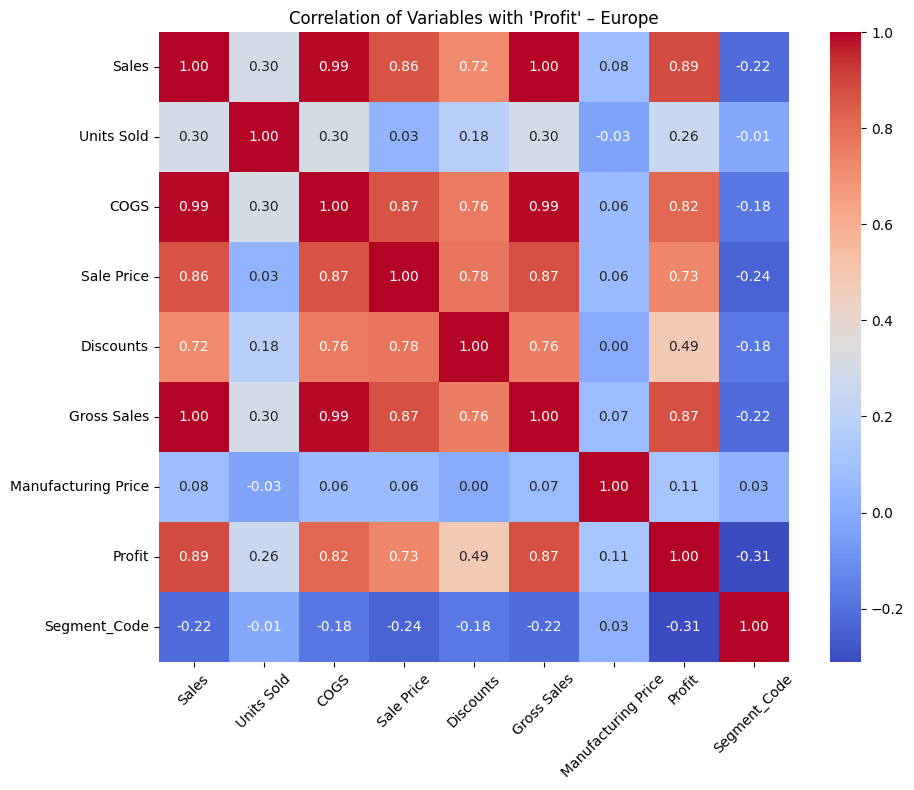

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(europe_df[columns_to_check].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation of Variables with 'Profit' – Europe")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
import plotly.graph_objects as go

# Correlation values (make sure they are already calculated)
fr_corr = france_df[columns_to_check].corr()['Profit']
eu_corr = europe_df[columns_to_check].corr()['Profit']

# Combine into one DataFrame for comparison
compare_df = pd.DataFrame({
    'Feature': fr_corr.index,
    'France': fr_corr.values,
    'Europe': eu_corr.values
})

# Create the comparison bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=compare_df['Feature'],
    y=compare_df['France'],
    name='France',
    marker_color='indianred'
))

fig.add_trace(go.Bar(
    x=compare_df['Feature'],
    y=compare_df['Europe'],
    name='Europe',
    marker_color='lightskyblue'
))

fig.update_layout(
    title='Comparison of Correlation with Profit: France vs Europe',
    xaxis_title='Feature',
    yaxis_title='Correlation with Profit',
    barmode='group',
    xaxis_tickangle=-45,
    height=500
)

fig.show()

